In [83]:
import os
import numpy as np
import panel as pn
pn.extension('plotly')
import plotly.express as px

import pandas as pd
import hvplot.pandas

import cufflinks as cf
cf.set_config_file(theme='solar',sharing='public',offline=True)
%matplotlib inline 

### What does the Australian GDP look like? Is AUS GDP similar for the same time-period (1995 - 2020) across countries in similar economic arenas?

In [96]:
#Load csv files
gdp = pd.read_csv("../Data/ProcessedData/GDP_selected_countries_cleaned.csv")#.set_index("Year")
gdp_new = gdp.rename(columns={"Unnamed: 0": "Year"})
gdp_new.set_index("Year", inplace=True)
#gdp_drop_unnamed = gdp_new.loc[:, ~gdp_new.columns.str.contains('^Unnamed')]

In [97]:
#Create line plots
gdp_hvplot = gdp_new.hvplot.line()
gdp_hvplot

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

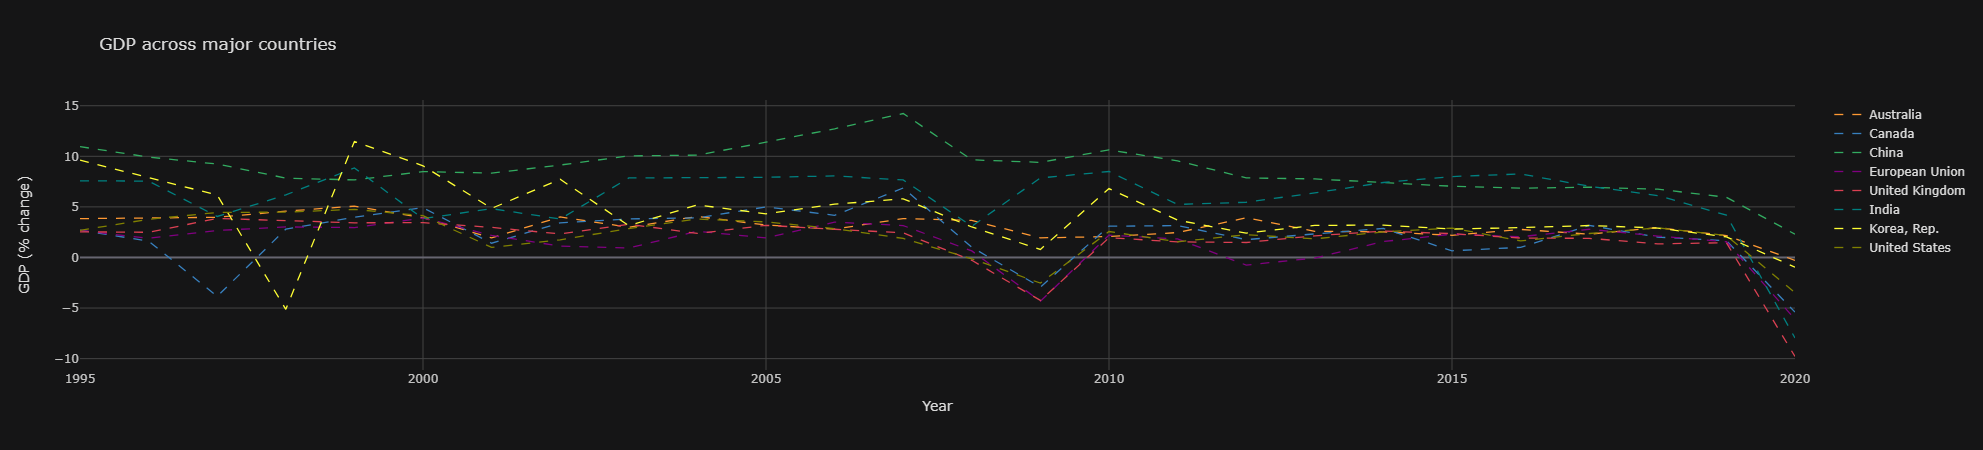

In [98]:
gdp_iplot = gdp_new.iplot(kind='line',
                          dash='dash',
                          title="GDP across major countries",
                          xTitle="Year",
                          yTitle='GDP (% change)')

## 

### What are the key factors driving GDP - demonstrate using CorrPlot


In [124]:
# Read in population data
population = pd.read_csv("../Data/ProcessedData/Population_June_Cleaned.csv")
del population["Unnamed: 0"]
population.head()

,Year,Births,Deaths,NaturalIncreases,InterstateArrivals,OverseasArrivals,OverseasDepartures,NetOverseasDepartures,NetOverseasMigration,EstimatedResidentPopulation,PercenChangeOverThePreviousYear
0,1995,64.3,31.5,32.8,96.0,50.5,32.7,32.7,23.8,18004.9,1.12
1,1996,62.0,31.7,30.3,84.8,49.9,34.2,34.2,20.6,18224.8,1.22
2,1997,63.6,31.4,32.2,90.0,49.5,38.9,38.9,6.1,18423.0,1.09
3,1998,62.3,31.8,30.5,89.4,54.1,45.6,45.6,8.5,18607.6,1.00
4,1999,62.7,32.2,30.5,89.2,55.6,40.8,40.8,14.8,18812.3,1.10


In [88]:
# Read in employment data
employment = pd.read_csv("../Data/ProcessedData/employment__cleaned.csv")
employment.head()

,Year,TotalEmployed,TotalEmployed_M,TotalEmployed_F,Employment_To_Population_Ratio,Employment_To_Population_Ratio_M,Employment_To_Population_Ratio_F,TotalUnemployed,TotalUnemployed_M,TotalUnemployed_F,Population 15 and over,Population 15 and over_M,Population 15 and over_F
0,1995,8205.6,4657.4,3548.3,58.3,67.3,49.6,723.5,434.2,289.3,14070.5,6922.5,7148.0
1,1996,8311.7,4724.4,3587.3,58.2,67.3,49.5,723.8,424.3,299.5,14271.2,7017.8,7253.4
2,1997,8345.6,4731.9,3613.6,57.7,66.6,49.1,735.2,427.5,307.7,14455.4,7101.7,7353.8
3,1998,8516.8,4801.8,3715.0,58.2,66.8,49.9,702.8,419.9,282.9,14633.9,7186.3,7447.6
4,1999,8673.2,4897.8,3775.5,58.5,67.3,50.0,600.6,348.6,252.0,14826.6,7277.7,7548.9


In [117]:
# Get data to run correlation
year = population[["Year"]]
gdp_aus_new = gdp_new[["Australia"]].reset_index(drop=True)
total_population = population[["EstimatedResidentPopulation"]]
total_employed = employment[["TotalEmployed"]]
total_employed_males = employment[["TotalEmployed_M"]]
total_employed_females = employment[["TotalEmployed_F"]]
total_unemployed = employment[["TotalUnemployed"]]
total_unemployed_males = employment[["TotalUnemployed_M"]]
total_unemployed_females = employment[["TotalUnemployed_F"]]

In [119]:
correlation_df = pd.concat([gdp_aus_new,
                            total_population,
                            total_employed, 
                            total_employed_males,
                            total_employed_females,
                            total_unemployed,
                            total_unemployed_males,
                            total_unemployed_females], axis=1)

correlation_renamed_df = correlation_df.rename(columns={"EstimatedResidentPopulation": "Population"})
correlation_renamed_df.head()

,Australia,Population,TotalEmployed,TotalEmployed_M,TotalEmployed_F,TotalUnemployed,TotalUnemployed_M,TotalUnemployed_F
0,3.837755,18004.9,8205.6,4657.4,3548.3,723.5,434.2,289.3
1,3.878585,18224.8,8311.7,4724.4,3587.3,723.8,424.3,299.5
2,3.966538,18423.0,8345.6,4731.9,3613.6,735.2,427.5,307.7
3,4.576689,18607.6,8516.8,4801.8,3715.0,702.8,419.9,282.9
4,5.073599,18812.3,8673.2,4897.8,3775.5,600.6,348.6,252.0


In [121]:
correlation = correlation_renamed_df.corr()
correlation

,Australia,Population,TotalEmployed,TotalEmployed_M,TotalEmployed_F,TotalUnemployed,TotalUnemployed_M,TotalUnemployed_F
Australia,1.000000,-0.691931,-0.656788,-0.639940,-0.670489,-0.491373,-0.325596,-0.649577
Population,-0.691931,1.000000,0.988475,0.983934,0.991038,0.363551,0.114982,0.647975
TotalEmployed,-0.656788,0.988475,1.000000,0.999140,0.999353,0.228864,-0.022022,0.533304
TotalEmployed_M,-0.639940,0.983934,0.999140,1.000000,0.997002,0.207767,-0.043831,0.515813
TotalEmployed_F,-0.670489,0.991038,0.999353,0.997002,1.000000,0.246857,-0.003061,0.547741
TotalUnemployed,-0.491373,0.363551,0.228864,0.207767,0.246857,1.000000,0.959710,0.927733
TotalUnemployed_M,-0.325596,0.114982,-0.022022,-0.043831,-0.003061,0.959710,1.000000,0.785476
TotalUnemployed_F,-0.649577,0.647975,0.533304,0.515813,0.547741,0.927733,0.785476,1.000000


In [123]:
heatmap_plot = correlation.hvplot.heatmap(ymarks_hover_color='cyan',
                                          hover_color='cyan',
                                          alpha=0.9,
                                          colorbar=True,
                                          cmap='bjy')

heatmap_plot

:HeatMap   [columns,index]   (value)

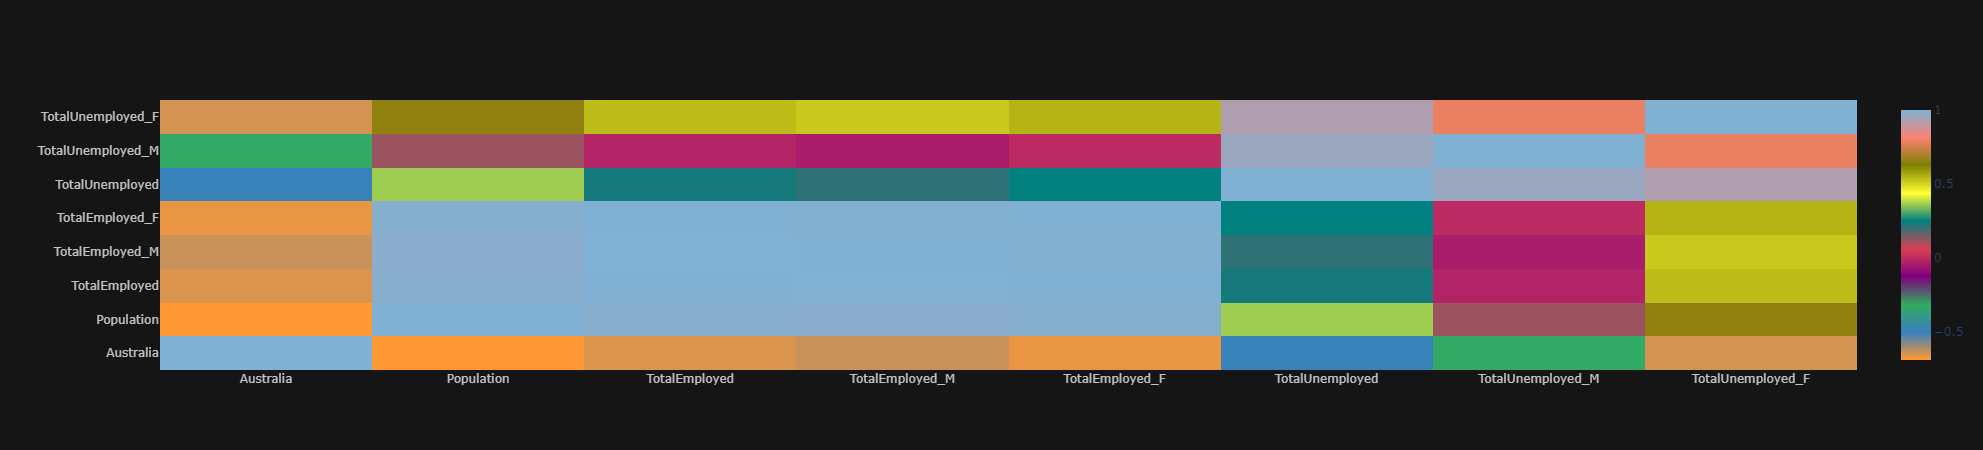

In [122]:
corrplot = correlation.iplot(kind='heatmap')
corrplot